In [1]:
import rosbag
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tf
from scipy.signal import find_peaks

In [2]:
bag = rosbag.Bag('/home/hakanergin/code/rosbags/static/rotation/21h7/s_yaw_21h7_2m_720_30.bag')

# create variables
target = 'yaw'
true_value = 'true_yaw'

# input values in degrees. the order matters, it will be used for binning 
input_vals = [0,15,30,45,60,75]

In [3]:
topic = '/tf'

rows = []

for topic, msg, t in bag.read_messages(topics=topic):
    
    time = t

    # conversion to euler
    rotation_quat = msg.transforms[0].transform.rotation
    pitch, yaw, roll = tf.transformations.euler_from_quaternion([rotation_quat.x,rotation_quat.y,rotation_quat.z,rotation_quat.w], axes='rxyz')

    # all rotations
    # rotation_euler = (np.degrees(pitch), np.degrees(yaw), np.degrees(roll))

    # create row
    row={'time': time.to_sec(), target: np.degrees(yaw)}
    rows.append(row)

df = pd.DataFrame.from_records(rows)

In [4]:
# calculate relative time in seconds instead of absolute time
df['relative_time'] =  df.loc[0:, 'time'] - df.at[0, 'time']
df = df.drop(columns=['time'])
df = df[['relative_time', target]]
df

,relative_time,yaw
0,0.000000,37.608574
1,1.170124,-9.011136
2,1.737013,11.480065
3,2.337898,7.298872
4,3.057086,7.711818
...,...,...
478,92.082222,75.073368
479,92.261627,75.090942
480,92.600167,73.947656
481,92.774243,73.964050


In [5]:
# drop errors caused by video
df = df.drop(df[df.relative_time < 5].index).reset_index()

<AxesSubplot:xlabel='relative_time'>

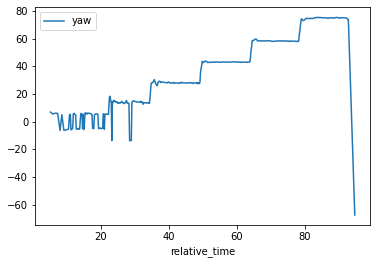

In [6]:
# initial graph
df.plot(x='relative_time', y=target)

In [7]:
# find plateaus
x = df[target]
peaks, _ = find_peaks(x, threshold=(0, 1)) # from find_peaks docs: Threshold: The first element is always interpreted as the minimal and the second, if supplied, as the maximal required threshold.

In [8]:
# the amount of data points we are left with
len(x[peaks])

111

In [9]:
# create filtered data frame
df_filtered_by_targets = df.loc[peaks]

<AxesSubplot:xlabel='relative_time', ylabel='yaw'>

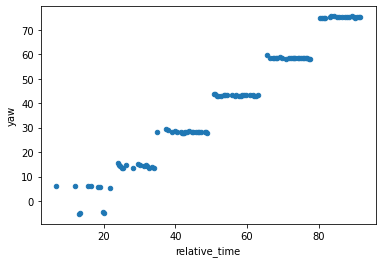

In [10]:
df_filtered_by_targets.plot.scatter(x='relative_time', y=target)

In [11]:
# segmenting/binning by real value
df_filtered_by_targets[true_value] = pd.cut(df_filtered_by_targets[target], bins=len(input_vals), labels=input_vals)


In [12]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    display(df_filtered_by_targets)

,index,relative_time,yaw,true_yaw
2,9,6.608387,6.122465,0
16,23,12.046675,6.068361,0
21,28,12.899251,-5.335522,0
23,30,13.234359,-4.878673,0
37,44,15.639305,6.317870,0
41,48,16.332955,6.147422,0
53,60,18.414946,5.556639,0
55,62,18.767830,5.691883,0
60,67,19.625995,-4.655000,0
63,70,20.143499,-4.899461,0


In [13]:
# calculate the error
df_filtered_by_targets['error'] =  df_filtered_by_targets.apply(lambda row: row[true_value] - row[target], axis=1)

In [14]:
grouped_df = df_filtered_by_targets.groupby(true_value)

In [15]:
# verify if the bins are in correct order, this is dictated by input_vals order
grouped_df.tail(2)

,index,relative_time,yaw,true_yaw,error
63,70,20.143499,-4.899461,0,4.899461
72,79,21.666729,5.445846,0,-5.445846
141,148,33.571251,13.785243,15,1.214757
143,150,33.905225,13.672563,15,1.327437
225,232,48.460531,28.341795,30,1.658205
227,234,48.799403,27.770285,30,2.229715
305,312,62.517621,43.134559,45,1.865441
308,315,63.061254,43.183894,45,1.816106
387,394,77.251489,58.276112,60,1.723888
389,396,77.620233,58.246058,60,1.753942


In [16]:
grouped_df.error.describe()

,count,mean,std,min,25%,50%,75%,max
true_yaw,,,,,,,,
0,11.0,-1.961985,5.482213,-6.317870,-6.095413,-5.556639,4.766836,5.335522
15,15.0,0.701181,0.627611,-0.458019,0.221417,0.655497,1.322391,1.494183
30,22.0,1.722479,0.343857,0.670400,1.662048,1.799170,1.916293,2.229715
45,21.0,1.760096,0.215685,1.048355,1.736726,1.810426,1.865441,2.077489
60,23.0,1.482171,0.314370,0.157547,1.453664,1.500804,1.624321,1.780054
75,19.0,-0.206726,0.250561,-0.555126,-0.360051,-0.258479,-0.063097,0.276713


In [17]:
def box_plotter(column_name):
    fig, axes = plt.subplots(1,len(input_vals))

    for i, val in enumerate(input_vals):
        grouped_df.get_group(val).boxplot(column=column_name, ax=axes.flatten()[i])
        axes.flatten()[i].set_title(val)


    plt.tight_layout()
    plt.show()

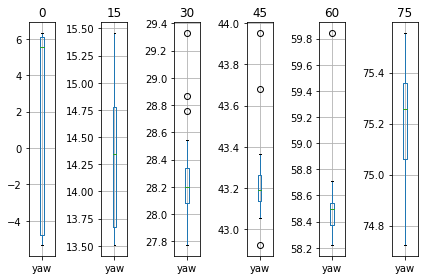

In [18]:
box_plotter(target)

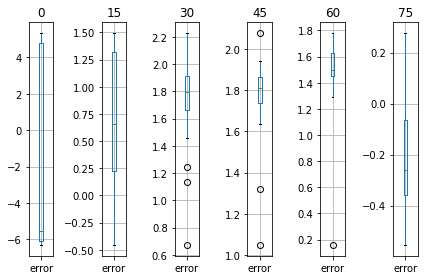

In [19]:
box_plotter('error')

In [20]:
df_filtered_by_targets.to_csv('/home/hakanergin/code/apriltag_test_bench/test_pipeline/scripts/static_tests/rotations/result/csv/2m_21h7_720.csv')